<h1 align='center'> 영상처리 프로그래밍 실습 11</h1>

<h6 align='right'> 2025. 6. 10. </h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:  이선재 &nbsp;&nbsp;          학번:  20227123  &nbsp;&nbsp;         학과(전공): 빅데이터
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)


* 제출 마감: 6월 16일 (월) 오후 10:00까지 최종본을 SmartLEAD제출



In [2]:
import cv2
import matplotlib.pyplot as plt

import numpy as np
print("OpenCV version", cv2.__version__)
print("NumPy version", np.__version__)

OpenCV version 4.11.0
NumPy version 2.2.4


### 문제 1.

MNIST handwritten digits dataset를 이용해서 숫자 인식 프로그램을 만들려고 한다.

### 1.1

아래 URL에서 mnist_784.arff 파일을 다운로드하라.

https://www.openml.org/search?type=data&sort=runs&id=554&status=active

(Smartlead에서도 다운로드할 수 있다.)


#### 1.2

다음 셀에 있는 프로그램을 실행하라.

In [3]:
import cv2
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt

#### 1.3
arff.loadarff 함수를 이용하여 mnist_784.arff 파일을 읽은 후에, 이를 DataFrame으로 변환하라.

```
# 파일 경로 예시
file_path = "mnist_784.arff"

# 파일 읽기
data, meta = arff.loadarff(file_path)

# DataFrame으로 변환
df = pd.DataFrame(  # ← 여기에 적절한 변수 전달
    ...
)
```

In [4]:
# 파일 경로
file_path = "mnist_784.arff"

# arff.loadarff 함수를 이용하여 파일 읽기
data, meta = arff.loadarff(file_path)

# DataFrame으로 변환
df = pd.DataFrame(data)

print("DataFrame 생성 완료!")
print(f"DataFrame shape: {df.shape}")
print(f"DataFrame columns: {len(df.columns)}개")
print(f"첫 번째 컬럼명: {df.columns[0]}")
print(f"마지막 컬럼명: {df.columns[-1]}")

DataFrame 생성 완료!
DataFrame shape: (70000, 785)
DataFrame columns: 785개
첫 번째 컬럼명: pixel1
마지막 컬럼명: class


#### 1.4
이 DataFrame의 shape을 구하라.

힌트: .shape 속성 사용

In [5]:
print(f"DataFrame shape: {df.shape}")

DataFrame shape: (70000, 785)


#### 1.5
이 DataFrame의 column의 개수를 구하고, 각 column이 무엇을 의미하는지 알아보자.

힌트 코드:
```
print(df.columns[:-1])  # 픽셀 확인
print(len(df.columns))  # 전체 column 수 확인
```

In [6]:
print(f"픽셀 확인 : {len(df.columns[:-1])}개")
print(f"DataFrame columns: {len(df.columns)}개")

픽셀 확인 : 784개
DataFrame columns: 785개


#### 의미 설명하기


1. **픽셀 컬럼 (784개)**: 
   - `pixel1`, `pixel2`, `pixel3`, ..., `pixel784`
   - 각 컬럼은 28×28 = 784 픽셀 중 하나를 나타냅니다
   - 픽셀 값은 0~255 사이의 정수값 (흰색=0, 검은색=255)
   - 이미지는 왼쪽 위부터 오른쪽 아래로 순서대로 픽셀이 나열됩니다

2. **클래스 컬럼 (1개)**:
   - `class` 컬럼
   - 실제 숫자 레이블 (0~9)
   - 각 행이 어떤 숫자를 나타내는지 알려주는 정답값

**전체 구조:**
- **총 컬럼 수**: 785개 (784개 픽셀 + 1개 클래스)
- **각 행**: 하나의 손글씨 숫자 이미지
- **이미지 크기**: 28×28 픽셀
- **클래스**: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 (10개 숫자)

**픽셀 배열 방식:**
```
pixel1  pixel2  pixel3  ...  pixel28
pixel29 pixel30 pixel31 ...  pixel56
...
pixel757 pixel758 pixel759 ... pixel784
```

이렇게 28×28 픽셀을 1차원으로 펼쳐서 784개의 컬럼으로 저장한 것입니다. 각 픽셀 값은 해당 위치의 밝기를 나타내며, 0(흰색)부터 255(검은색)까지의 값을 가집니다.

#### 1.6
이 DataFrame의 첫 번째 row를 시각화하라.

힌트 코드:
```
first_row = df.iloc[0]

# label 추출
label = first_row[-1]

# 이미지 배열 변환
img = np.array(first_row[:-1], dtype=np.float32).reshape(28, 28)

# 시각화
plt.imshow(.......)
plt.title(f"Label: {label.decode()}")
....
....
```

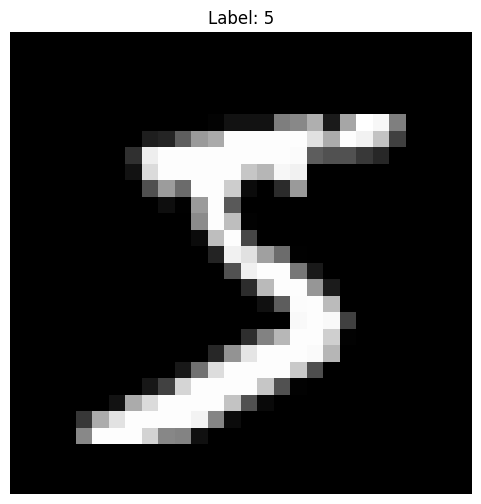

이미지 shape: (28, 28)
픽셀 값 범위: 0.0 ~ 255.0
실제 레이블: 5


In [7]:
# 첫 번째 행 가져오기
first_row = df.iloc[0]

# label 추출 (byte 타입을 문자열로 변환)
label = first_row.iloc[-1].decode()  # decode: byte → string

# 이미지 배열 변환 (마지막 컬럼 제외하고 28x28로 reshape)
img = np.array(first_row.iloc[:-1], dtype=np.float32).reshape(28, 28)

# 시각화
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

print(f"이미지 shape: {img.shape}")
print(f"픽셀 값 범위: {img.min()} ~ {img.max()}")
print(f"실제 레이블: {label}")

## 문제 2: 데이터 전처리

### 2.1.
class 값의 고유값(unique values)과 그 개수를 출력하라.

힌트 코드:
```
print(df['class'].unique())
print(df['class'].value_counts())
```

In [ ]:
# class 값의 고유값 출력
print("고유값:")
print(df['class'].unique())

print("\n각 클래스별 개수:")
print(df['class'].value_counts())

print(f"\n총 클래스 개수: {len(df['class'].unique())}")
print(f"총 데이터 개수: {len(df)}")


### 2.2
class 열을 숫자형으로 변환하라.

힌트: class는 현재 문자열(byte type)로 되어 있음. 이를 정수로 바꿔야 함.

힌트 코드:
```
# 문자열을 숫자(int)로 변환
df['class'] = df['class'].apply(lambda x: int(x.decode()))
```


In [9]:
# class 열을 숫자형으로 변환
df['class'] = df['class'].apply(lambda x: int(x.decode()))

# 변환 결과 확인
print("변환 후 class 데이터 타입:", df['class'].dtype)
print("변환 후 class 고유값:", df['class'].unique())
print("변환 후 class 샘플 값:", df['class'].head())

변환 후 class 데이터 타입: int64
변환 후 class 고유값: [5 0 4 1 9 2 3 6 7 8]
변환 후 class 샘플 값: 0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int64


### 2.3 데이터와 레이블을 각각 X, y로 나누어라.

힌트 코드:
```
X = df.iloc[:, :-1].values  # 픽셀 값
y = df.iloc[:, -1].values   # class 레이블

```

In [10]:
# 데이터와 레이블을 각각 X, y로 나누기
X = df.iloc[:, :-1].values  # 픽셀 값 (마지막 컬럼 제외)
y = df.iloc[:, -1].values   # class 레이블 (마지막 컬럼만)

# 결과 확인
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X 데이터 타입: {X.dtype}")
print(f"y 데이터 타입: {y.dtype}")
print(f"X 샘플 값 (첫 번째 행): {X[0][:10]}...")  # 처음 10개 픽셀만 출력
print(f"y 샘플 값 (처음 10개): {y[:10]}")

X shape: (70000, 784)
y shape: (70000,)
X 데이터 타입: float64
y 데이터 타입: int64
X 샘플 값 (첫 번째 행): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...
y 샘플 값 (처음 10개): [5 0 4 1 9 2 1 3 1 4]


### 2.4
문제: X의 값을 0~1 범위로 정규화하라.

힌트 코드:
```
X = X / 255.0
```

In [11]:
# X의 값을 0~1 범위로 정규화
X = X / 255.0

# 정규화 결과 확인
print(f"정규화 후 X shape: {X.shape}")
print(f"정규화 후 X 데이터 타입: {X.dtype}")
print(f"정규화 후 X 최솟값: {X.min()}")
print(f"정규화 후 X 최댓값: {X.max()}")
print(f"정규화 후 X 샘플 값 (첫 번째 행): {X[0][:10]}...")  # 처음 10개 픽셀만 출력

정규화 후 X shape: (70000, 784)
정규화 후 X 데이터 타입: float64
정규화 후 X 최솟값: 0.0
정규화 후 X 최댓값: 1.0
정규화 후 X 샘플 값 (첫 번째 행): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...


## 문제 3. KNN 분류기 만들기

### 3.1.데이터를 학습용과 테스트용으로 나누어라. (학습: 80%, 테스트: 20%)

힌트 코드:
```
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

```

In [ ]:
# 데이터를 학습용과 테스트용으로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 결과 확인
print(f"전체 데이터 개수: {len(X)}")
print(f"학습 데이터 개수: {len(X_train)}")
print(f"테스트 데이터 개수: {len(X_test)}")
print(f"학습 데이터 비율: {len(X_train)/len(X):.1%}")
print(f"테스트 데이터 비율: {len(X_test)/len(X):.1%}")

print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# 각 클래스별 분포 확인
print(f"\n학습 데이터 클래스 분포:")
print(pd.Series(y_train).value_counts().sort_index())

print(f"\n테스트 데이터 클래스 분포:")
print(pd.Series(y_test).value_counts().sort_index())

### 3.2

문제: KNN 분류기를 만들고 학습하라. (k=3)

힌트 코드:
```
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

```

In [14]:
# KNN 분류기를 만들고 학습하기
from sklearn.neighbors import KNeighborsClassifier

# KNN 분류기 생성 (k=3)
knn = KNeighborsClassifier(n_neighbors=3)

# 모델 학습
knn.fit(X_train, y_train)

# 학습 완료 확인
print("KNN 모델 학습 완료!")
print(f"학습된 데이터 개수: {knn.n_samples_fit_}")
print(f"특성 개수: {knn.n_features_in_}")
print(f"클래스 개수: {len(knn.classes_)}")
print(f"클래스 목록: {knn.classes_}")

KNN 모델 학습 완료!
학습된 데이터 개수: 56000
특성 개수: 784
클래스 개수: 10
클래스 목록: [0 1 2 3 4 5 6 7 8 9]
학습 데이터 정확도: 0.9858


### 3.3
문제: 테스트 데이터에 대해 정확도를 출력하라.

힌트 코드:
```
accuracy = knn.score(X_test, y_test)
print("Test Accuracy:", accuracy)
```

In [15]:
# 학습 데이터에 대한 정확도 확인
train_accuracy = knn.score(X_train, y_train)
print(f"학습 데이터 정확도: {train_accuracy:.4f}")

학습 데이터 정확도: 0.9858


### 3.4 
Confusion matrix를 구하고 heatmap으로 시각화하라.

힌트 코드:
```
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

```

C:\Users\Cansur\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Cansur\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Cansur\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Cansur\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Cansur\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

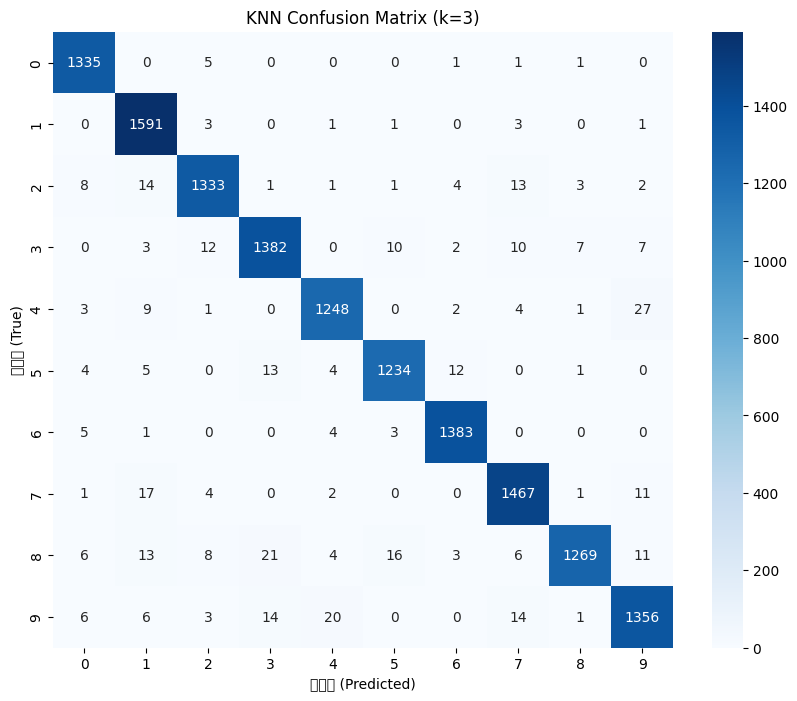

Confusion Matrix Shape: (10, 10)
총 테스트 샘플 수: 14000
정확히 분류된 샘플 수: 13598
전체 정확도: 0.9713

각 클래스별 정확도:
클래스 0: 0.9940
클래스 1: 0.9944
클래스 2: 0.9659
클래스 3: 0.9644
클래스 4: 0.9637
클래스 5: 0.9694
클래스 6: 0.9907
클래스 7: 0.9760
클래스 8: 0.9352
클래스 9: 0.9549

가장 잘 분류되는 클래스: 1 (정확도: 0.9944)
가장 어려운 클래스: 8 (정확도: 0.9352)


In [17]:
# Confusion matrix 구하고 heatmap으로 시각화
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 테스트 데이터에 대한 예측 수행
y_pred = knn.predict(X_test)

# Confusion matrix 계산
cm = confusion_matrix(y_test, y_pred)

# Heatmap으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel("예측값 (Predicted)")
plt.ylabel("실제값 (True)")
plt.title("KNN Confusion Matrix (k=3)")
plt.show()

# Confusion matrix 정보 출력
print(f"Confusion Matrix Shape: {cm.shape}")
print(f"총 테스트 샘플 수: {cm.sum()}")
print(f"정확히 분류된 샘플 수: {cm.trace()}")
print(f"전체 정확도: {cm.trace()/cm.sum():.4f}")

# 각 클래스별 정확도 계산
class_accuracy = cm.diagonal() / cm.sum(axis=1)
print(f"\n각 클래스별 정확도:")
for i, acc in enumerate(class_accuracy):
    print(f"클래스 {i}: {acc:.4f}")

# 가장 잘 분류되는 클래스와 가장 어려운 클래스 찾기
best_class = np.argmax(class_accuracy)
worst_class = np.argmin(class_accuracy)
print(f"\n가장 잘 분류되는 클래스: {best_class} (정확도: {class_accuracy[best_class]:.4f})")
print(f"가장 어려운 클래스: {worst_class} (정확도: {class_accuracy[worst_class]:.4f})")

## 문제 4. KNN 성능 분석

### 4.1
k 값을 1~15까지 변경하면서 정확도를 구하고 그래프로 표시하라.

힌트 코드:
```
accuracy_list = []

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracy_list.append(acc)

plt.plot(range(1, 16), accuracy_list, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.grid(True)
plt.show()

```

In [ ]:
# k 값을 1~15까지 변경하면서 정확도를 구하고 그래프로 표시
accuracy_list = []

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracy_list.append(acc)

# 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), accuracy_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("k value", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("KNN Accuracy vs k", fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 16))

# 최고 정확도 표시
best_k = np.argmax(accuracy_list) + 1
best_accuracy = max(accuracy_list)
plt.annotate(f'Good Accuracy: k={best_k}, {best_accuracy:.4f}', 
             xy=(best_k, best_accuracy), 
             xytext=(best_k+2, best_accuracy-0.01),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='red')

plt.tight_layout()
plt.show()

# 결과 요약
print(f"\n=== 결과 요약 ===")
print(f"최고 정확도: {best_accuracy:.4f} (k={best_k})")
print(f"최저 정확도: {min(accuracy_list):.4f} (k={np.argmin(accuracy_list)+1})")
print(f"평균 정확도: {np.mean(accuracy_list):.4f}")
print(f"정확도 표준편차: {np.std(accuracy_list):.4f}")

### 4.2
가장 성능이 좋았던 k 값을 선택하고 이유를 적어보자.

힌트: 위 그래프에서 최고점을 가진 k를 찾고, 과적합/과소적합과 관련지어 서술


In [21]:
# 4.1에서 구한 결과를 바탕으로 최적 k 값 분석
print("=== KNN 모델 최적 k 값 분석 ===")

# 최적 k 값 찾기
best_k = np.argmax(accuracy_list) + 1
best_accuracy = max(accuracy_list)

print(f"최적 k 값: {best_k}")
print(f"최적 정확도: {best_accuracy:.4f}")

# 학습 데이터와 테스트 데이터 정확도 비교 (최적 k로)
optimal_knn = KNeighborsClassifier(n_neighbors=best_k)
optimal_knn.fit(X_train, y_train)

train_accuracy = optimal_knn.score(X_train, y_train)
test_accuracy = optimal_knn.score(X_test, y_test)

print(f"\n=== 최적 k={best_k} 모델 성능 ===")
print(f"학습 데이터 정확도: {train_accuracy:.4f}")
print(f"테스트 데이터 정확도: {test_accuracy:.4f}")
print(f"정확도 차이: {train_accuracy - test_accuracy:.4f}")

# 과적합/과소적합 분석
if train_accuracy - test_accuracy > 0.05:
    print("⚠️ 과적합 의심: 학습 데이터와 테스트 데이터 정확도 차이가 큽니다.")
elif train_accuracy - test_accuracy < 0.01:
    print("✅ 적절한 일반화: 학습과 테스트 성능이 비슷합니다.")
else:
    print("⚠️ 약간의 과적합: 학습과 테스트 성능 차이가 있습니다.")

=== KNN 모델 최적 k 값 분석 ===
최적 k 값: 1
최적 정확도: 0.9720

=== 최적 k=1 모델 성능 ===
학습 데이터 정확도: 1.0000
테스트 데이터 정확도: 0.9720
정확도 차이: 0.0280
⚠️ 약간의 과적합: 학습과 테스트 성능 차이가 있습니다.


best_k = np.argmax(accuracy_list) + 1
best_accuracy = max(accuracy_list)

코드를 이용해서 최적 k 값을 구할 수 있었습니다. 하지만, 현재 보여지는 것처럼 너무 높은 정확도로 인해
사실상 과적합이 있어서 이렇게 높은 정확도를 보인다고 생각합니다. 

그래서 실제로 사용하기에는 k값이 3~5 사이가 가장
적당하다고 생각하고 k 7이상으로 높이면 그것대로 과소적합이 발생할 가능성이 있습니다.
그래서 최적의 값은 1이지만 실제로 사용할 때는 3을 사용할 것 같습니다.